<a href="https://colab.research.google.com/github/laakshit-D/basic-nn-model/blob/main/DLEx01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

In [7]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [8]:
worksheet = gc.open('MyMLData').sheet1

In [9]:
rows = worksheet.get_all_values()

In [10]:
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'INPUT':'float'})
df = df.astype({'OUTPUT':'float'})

df.head()

,INPUT,OUTPUT
0,1.0,23.0
1,2.0,42.0
2,3.0,56.0
3,4.0,76.0
4,5.0,12.0


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [12]:
import numpy as np
x=[]
y=[]
for i in range(60):
  num = i+1
  x.append(num)
  y.append(num*12)
df=pd.DataFrame({'INPUT': x, 'OUTPUT': y})
df.head()

,INPUT,OUTPUT
0,1,12
1,2,24
2,3,36
3,4,48
4,5,60


In [13]:
inp=df[["INPUT"]].values
out=df[["OUTPUT"]].values
Input_train,Input_test,Output_train,Output_test=train_test_split(inp,out,test_size=0.33)
Scaler=MinMaxScaler()
Scaler.fit(Input_train)
Scaler.fit(Input_test)
Input_train=Scaler.transform(Input_train)
Input_test=Scaler.transform(Input_test)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
model=Sequential([Dense(5,activation='relu'),
                  Dense(10,activation='relu'),
                  Dense(1)])
model.compile(loss="mse",optimizer="rmsprop")
history=model.fit(Input_train,Output_train, epochs=3000,batch_size=32)

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 13ms/step - loss: 168629.0781
Epoch 502/3000
2/2 [==============================] - 0s 18ms/step - loss: 168613.2812
Epoch 503/3000
2/2 [==============================] - 0s 18ms/step - loss: 168596.6250
Epoch 504/3000
2/2 [==============================] - 0s 15ms/step - loss: 168579.7188
Epoch 505/3000
2/2 [==============================] - 0s 17ms/step - loss: 168563.5469
Epoch 506/3000
2/2 [==============================] - 0s 12ms/step - loss: 168547.3594
Epoch 507/3000
2/2 [==============================] - 0s 26ms/step - loss: 168530.3281
Epoch 508/3000
2/2 [==============================] - 0s 13ms/step - loss: 168513.6875
Epoch 509/3000
2/2 [==============================] - 0s 12ms/step - loss: 168494.5938
Epoch 510/3000
2/2 [==============================] - 0s 25ms/step - loss: 168477.1719
Epoch 511/3000
2/2 [==============================] - 0s 23ms/step - loss: 168460.2188
Epoch 5

Enter the value to predict:12
1/1 [==============================] - 0s 98ms/step
The prediction for the given input 12 is:304
1/1 [==============================] - 0s 144ms/step - loss: 18261.8711


<ipython-input-17-4441404bb419>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("The prediction for the given input "+str(prediction_test)+" is:"+str(int(np.round(preds))))


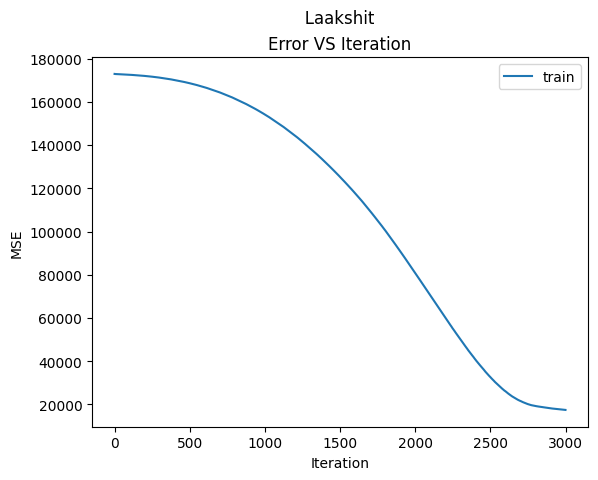

In [17]:
prediction_test=int(input("Enter the value to predict:"))
preds=model.predict(Scaler.transform([[prediction_test]]))
print("The prediction for the given input "+str(prediction_test)+" is:"+str(int(np.round(preds))))

model.evaluate(Input_test,Output_test)

import matplotlib.pyplot as plt
plt.suptitle("   Laakshit")
plt.title("Error VS Iteration")
plt.ylabel('MSE')
plt.xlabel('Iteration')
plt.plot(pd.DataFrame(history.history))
plt.legend(['train'] )
plt.show()

In [19]:
worksheet = gc.open('MyMLData').sheet1
data = worksheet.get_all_values()

dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'INPUT':'float'})
dataset1 = dataset1.astype({'OUTPUT':'float'})

dataset1.head()

,INPUT,OUTPUT
0,1.0,23.0
1,2.0,42.0
2,3.0,56.0
3,4.0,76.0
4,5.0,12.0


In [20]:
x=[]
y=[]
X = dataset1[['INPUT']].values
y = dataset1[['OUTPUT']].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)
Scaler = MinMaxScaler()
Scaler.fit(X_train)
X_train1 = Scaler.transform(X_train)

In [21]:
ai_brain = Sequential([
    Dense(3,activation='relu'),
    Dense(4,activation='relu'),
    Dense(1)
])
ai_brain.compile(optimizer='rmsprop',loss='mse')
ai_brain.fit(x=X_train1,y=y_train,epochs=50)

Epoch 1/50
1/1 [==============================] - 1s 508ms/step - loss: 1537.6666
Epoch 2/50
1/1 [==============================] - 0s 15ms/step - loss: 1537.4369
Epoch 3/50
1/1 [==============================] - 0s 10ms/step - loss: 1537.2701
Epoch 4/50
1/1 [==============================] - 0s 9ms/step - loss: 1537.1307
Epoch 5/50
1/1 [==============================] - 0s 13ms/step - loss: 1537.0068
Epoch 6/50
1/1 [==============================] - 0s 9ms/step - loss: 1536.8936
Epoch 7/50
1/1 [==============================] - 0s 9ms/step - loss: 1536.7871
Epoch 8/50
1/1 [==============================] - 0s 8ms/step - loss: 1536.6866
Epoch 9/50
1/1 [==============================] - 0s 9ms/step - loss: 1536.5903
Epoch 10/50
1/1 [==============================] - 0s 9ms/step - loss: 1536.4977
Epoch 11/50
1/1 [==============================] - 0s 11ms/step - loss: 1536.4076
Epoch 12/50
1/1 [==============================] - 0s 9ms/step - loss: 1536.3198
Epoch 13/50
1/1 [==============

<Axes: >

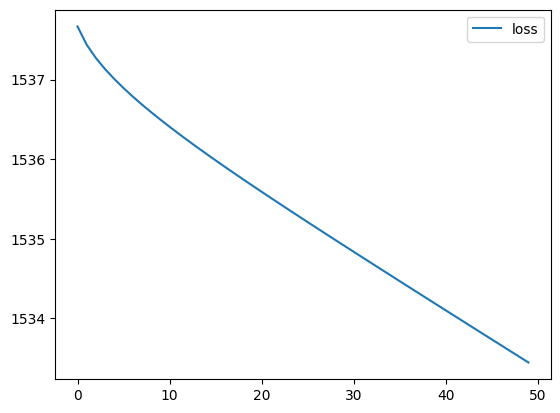

In [22]:
loss_df = pd.DataFrame(ai_brain.history.history)
loss_df.plot()